In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

# Define matrix size
size = 100

# Generate random binary values (0 or 1) for the channel matrix C
np.random.seed(42)  # For reproducibility
C = np.random.randint(0, 2, (size, size))

# Generate random values between 1 and 100 for the reward matrix R
R = np.random.randint(1, 101, (size, size))

# Save matrices to CSV files
pd.DataFrame(C).to_csv("channel_matrix.csv", index=False, header=False)
pd.DataFrame(R).to_csv("reward_matrix.csv", index=False, header=False)

print("Channel matrix and Reward matrix saved as 'channel_matrix.csv' and 'reward_matrix.csv'.")

Channel matrix and Reward matrix saved as 'channel_matrix.csv' and 'reward_matrix.csv'.


In [ ]:
import numpy as np
import pandas as pd

# Load the 100x100 channel matrix (C) and reward matrix (R) from CSV files
C = np.loadtxt('channel_matrix.csv', delimiter=',')
R = np.loadtxt('reward_matrix.csv', delimiter=',')

# Ensure both matrices are of size 100x100
assert C.shape == (100, 100), "Channel matrix C should be of size 100x100"
assert R.shape == (100, 100), "Reward matrix R should be of size 100x100"

# Normalize the reward matrix R to the range [0, 1]
R_normalized = R / 100.0

# Genetic algorithm parameters
population_size = 50      # Number of matrices in the population
mutation_rate = 0.1       # Mutation probability for each matrix cell
num_generations = 100     # Number of generations to run
selection_ratio = 0.2     # Percentage of top performers to keep

# Define the fitness function (sum of element-wise multiplication of 10x10 subsection of C and candidate R matrix)
def fitness_function(C, R):
    # Extract the 10x10 subsection (for example, top-left corner)
    C_subsection = C[:10, :10]
    R_subsection = R[:10, :10]
    return np.sum(np.multiply(C_subsection, R_subsection))

# Initialize the population with random matrices in the range [0, 1]
population = [np.random.rand(100, 100) for _ in range(population_size)]

# Evolution process
for generation in range(num_generations):
    # Calculate fitness scores for each matrix in the population
    fitness_scores = [fitness_function(C, individual) for individual in population]

    # Select the top-performing individuals
    top_performers_idx = np.argsort(fitness_scores)[-int(selection_ratio * population_size):]

    # Generate the next generation
    next_generation = []

    # Crossover: Combine pairs of top performers to create new matrices
    while len(next_generation) < population_size:
        parent_indices = np.random.choice(top_performers_idx, 2, replace=False)
        parent1 = population[parent_indices[0]]
        parent2 = population[parent_indices[1]]

        # Randomly choose crossover points
        mask = np.random.rand(100, 100) > 0.5
        child = np.where(mask, parent1, parent2)
        next_generation.append(child)

    # Mutation: Apply random changes to some elements in each matrix
    for individual in next_generation:
        mutation_mask = np.random.rand(100, 100) < mutation_rate
        individual[mutation_mask] = np.random.rand(np.sum(mutation_mask))

    # Update the population
    population = next_generation

# Get the best individual from the final generation
final_fitness_scores = [fitness_function(C, individual) for individual in population]
best_individual_idx = np.argmax(final_fitness_scores)
best_individual = population[best_individual_idx]

# Rescale the optimized reward matrix back to the original range [1, 100]
best_individual_rescaled = best_individual * 100

# Save the optimized reward matrix to a CSV file
#np.savetxt("optimized_reward_matrix_ga.csv", best_individual_rescaled, delimiter=',')

# Calculate final max sum reward based on the 10x10 subsection
final_max_sum_reward = fitness_function(C, best_individual_rescaled)

# Output the full channel matrix, original reward matrix, optimized reward matrix, and final max sum reward
# Extract the 10x10 subsections for output
C_subsection = C[:10, :10]
R_subsection = R[:10, :10]
optimized_subsection = best_individual_rescaled[:10, :10]

# Output the relevant matrices and values
print("Channel Matrix (C) - 10x10 Subsection:")
print(C_subsection)

print("\nOriginal Reward Matrix (R) - 10x10 Subsection:")
print(R_subsection)

print("\nOptimized Reward Matrix (R) - 10x10 Subsection:")
print(optimized_subsection)

print("\nFinal Max Sum Reward (based on 10x10 subsection):", final_max_sum_reward)


Channel Matrix (C) - 10x10 Subsection:
[[0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 1. 1. 0.]
 [0. 0. 0. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 0. 0. 1. 0. 1. 1.]
 [0. 1. 1. 1. 0. 0. 0. 1. 1. 1.]
 [1. 1. 0. 1. 0. 0. 1. 1. 1. 1.]
 [0. 1. 0. 0. 1. 1. 1. 0. 1. 0.]
 [0. 1. 1. 0. 0. 1. 1. 0. 0. 1.]]

Original Reward Matrix (R) - 10x10 Subsection:
[[51. 71. 96. 48. 19.  6. 84. 27. 53. 48.]
 [26. 38. 38. 61. 44. 86. 44. 74. 62.  6.]
 [30. 54. 13. 83. 29.  3. 90. 58. 76.  2.]
 [15. 38. 15.  5. 93. 83. 54. 51. 10. 12.]
 [95. 44. 31. 58. 87. 53. 84. 79. 23. 28.]
 [18. 47. 70. 57. 93. 19. 97. 65.  3. 42.]
 [49.  1. 10. 47. 59. 96. 62. 86. 18. 46.]
 [17.  7. 13. 66.  4. 10. 88. 17. 52.  6.]
 [25. 12. 71. 39. 17. 45. 11. 70. 23. 91.]
 [91. 36. 75. 82. 65. 63. 99. 35. 31. 28.]]

Optimized Reward Matrix (R) - 10x10 Subsection:
[[54.1340638  99.13509865 23.74200656 81.51375514 74.0726536  98.84661085
  64.36788423 62.94337862 78

In [ ]:
import numpy as np
import pandas as pd

# Load the 100x100 channel matrix (C) and reward matrix (R) from CSV files
C = np.loadtxt('channel_matrix.csv', delimiter=',')
R = np.loadtxt('reward_matrix.csv', delimiter=',')

# Ensure both matrices are of size 100x100
assert C.shape == (100, 100), "Channel matrix C should be of size 100x100"
assert R.shape == (100, 100), "Reward matrix R should be of size 100x100"

# Normalize the reward matrix R to the range [0, 1]
R_normalized = R / 100.0

# Genetic algorithm parameters
population_size = 50      # Number of matrices in the population
mutation_rate = 0.1       # Mutation probability for each matrix cell
num_generations = 100     # Number of generations to run
selection_ratio = 0.2     # Percentage of top performers to keep

# Define the fitness function (sum of element-wise multiplication of 15x15 subsection of C and candidate R matrix)
def fitness_function(C, R):
    # Extract the 15x15 subsection (top-left corner)
    C_subsection = C[:15, :15]
    R_subsection = R[:15, :15]
    return np.sum(np.multiply(C_subsection, R_subsection))

# Initialize the population with random matrices in the range [0, 1]
population = [np.random.rand(100, 100) for _ in range(population_size)]

# Evolution process
for generation in range(num_generations):
    # Calculate fitness scores for each matrix in the population
    fitness_scores = [fitness_function(C, individual) for individual in population]

    # Select the top-performing individuals
    top_performers_idx = np.argsort(fitness_scores)[-int(selection_ratio * population_size):]

    # Generate the next generation
    next_generation = []

    # Crossover: Combine pairs of top performers to create new matrices
    while len(next_generation) < population_size:
        parent_indices = np.random.choice(top_performers_idx, 2, replace=False)
        parent1 = population[parent_indices[0]]
        parent2 = population[parent_indices[1]]

        # Randomly choose crossover points
        mask = np.random.rand(100, 100) > 0.5
        child = np.where(mask, parent1, parent2)
        next_generation.append(child)

    # Mutation: Apply random changes to some elements in each matrix
    for individual in next_generation:
        mutation_mask = np.random.rand(100, 100) < mutation_rate
        individual[mutation_mask] = np.random.rand(np.sum(mutation_mask))

    # Update the population
    population = next_generation

# Get the best individual from the final generation
final_fitness_scores = [fitness_function(C, individual) for individual in population]
best_individual_idx = np.argmax(final_fitness_scores)
best_individual = population[best_individual_idx]

# Rescale the optimized reward matrix back to the original range [1, 100]
best_individual_rescaled = best_individual * 100

# Calculate final max sum reward based on the 15x15 subsection
final_max_sum_reward = fitness_function(C, best_individual_rescaled)

# Extract the 15x15 subsections for output
C_subsection = C[:15, :15]
R_subsection = R[:15, :15]
optimized_subsection = best_individual_rescaled[:15, :15]

# Output the relevant matrices and values
print("Channel Matrix (C) - 15x15 Subsection:")
print(C_subsection)

print("\nOriginal Reward Matrix (R) - 15x15 Subsection:")
print(R_subsection)

print("\nOptimized Reward Matrix (R) - 15x15 Subsection:")
print(optimized_subsection)

print("\nFinal Max Sum Reward (based on 15x15 subsection):", final_max_sum_reward)


Channel Matrix (C) - 15x15 Subsection:
[[0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0.]
 [1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1.]
 [0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.]
 [0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1.]
 [0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0.]
 [0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1.]
 [0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.]]

Original Reward Matrix (R) - 15x15 Subsection:
[[ 51.  71.  96.  48.  19.   6.  84.  27.  53.  48.   7.  59.  69.  11.
   15.]
 [ 26.  38.  38.  61.  44.  86.  44.  74.  62.   6.  17.  51.  38.  24.
   51.]
 [ 30.  54.  13.  83.  29.   3. 

Channel Matrix (C) - 15x15 Subsection:
[[0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0.]
 [1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1.]
 [0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.]
 [0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1.]
 [0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0.]
 [0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1.]
 [0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.]]

Original Reward Matrix (R) - 15x15 Subsection:
[[ 51.  71.  96.  48.  19.   6.  84.  27.  53.  48.   7.  59.  69.  11.
   15.]
 [ 26.  38.  38.  61.  44.  86.  44.  74.  62.   6.  17.  51.  38.  24.
   51.]
 [ 30.  54.  13.  83.  29.   3. 

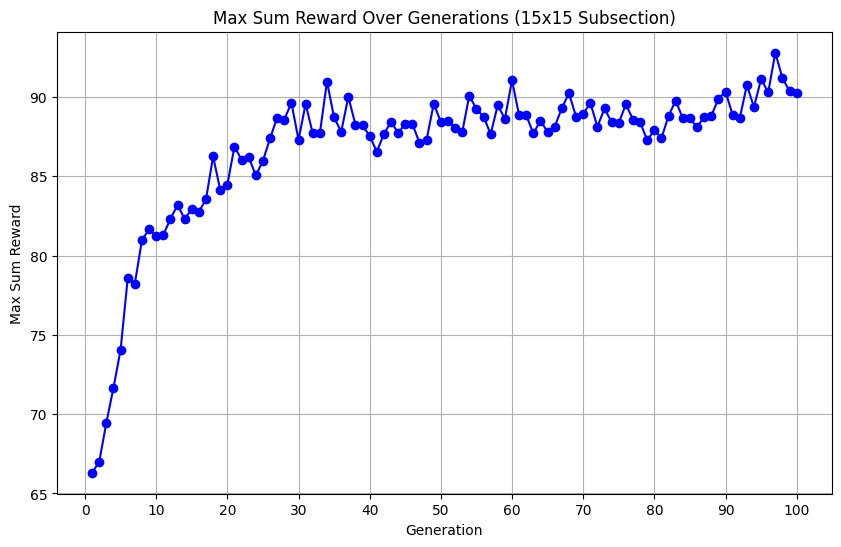

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the 100x100 channel matrix (C) and reward matrix (R) from CSV files
C = np.loadtxt('channel_matrix.csv', delimiter=',')
R = np.loadtxt('reward_matrix.csv', delimiter=',')

# Ensure both matrices are of size 100x100
assert C.shape == (100, 100), "Channel matrix C should be of size 100x100"
assert R.shape == (100, 100), "Reward matrix R should be of size 100x100"

# Normalize the reward matrix R to the range [0, 1]
R_normalized = R / 100.0

# Genetic algorithm parameters
population_size = 50      # Number of matrices in the population
mutation_rate = 0.1       # Mutation probability for each matrix cell
num_generations = 100     # Number of generations to run
selection_ratio = 0.2     # Percentage of top performers to keep

# List to store max sum rewards for each generation
max_rewards = []

# Define the fitness function (sum of element-wise multiplication of 15x15 subsection of C and candidate R matrix)
def fitness_function(C, R):
    # Extract the 15x15 subsection (top-left corner)
    C_subsection = C[:15, :15]
    R_subsection = R[:15, :15]
    return np.sum(np.multiply(C_subsection, R_subsection))

# Initialize the population with random matrices in the range [0, 1]
population = [np.random.rand(100, 100) for _ in range(population_size)]

# Evolution process
for generation in range(num_generations):
    # Calculate fitness scores for each matrix in the population
    fitness_scores = [fitness_function(C, individual) for individual in population]

    # Store the maximum fitness score for this generation
    max_rewards.append(max(fitness_scores))

    # Select the top-performing individuals
    top_performers_idx = np.argsort(fitness_scores)[-int(selection_ratio * population_size):]

    # Generate the next generation
    next_generation = []

    # Crossover: Combine pairs of top performers to create new matrices
    while len(next_generation) < population_size:
        parent_indices = np.random.choice(top_performers_idx, 2, replace=False)
        parent1 = population[parent_indices[0]]
        parent2 = population[parent_indices[1]]

        # Randomly choose crossover points
        mask = np.random.rand(100, 100) > 0.5
        child = np.where(mask, parent1, parent2)
        next_generation.append(child)

    # Mutation: Apply random changes to some elements in each matrix
    for individual in next_generation:
        mutation_mask = np.random.rand(100, 100) < mutation_rate
        individual[mutation_mask] = np.random.rand(np.sum(mutation_mask))

    # Update the population
    population = next_generation

# Get the best individual from the final generation
final_fitness_scores = [fitness_function(C, individual) for individual in population]
best_individual_idx = np.argmax(final_fitness_scores)
best_individual = population[best_individual_idx]

# Rescale the optimized reward matrix back to the original range [1, 100]
best_individual_rescaled = best_individual * 100

# Calculate final max sum reward based on the 15x15 subsection
final_max_sum_reward = fitness_function(C, best_individual_rescaled)

# Extract the 15x15 subsections for output
C_subsection = C[:15, :15]
R_subsection = R[:15, :15]
optimized_subsection = best_individual_rescaled[:15, :15]

# Output the relevant matrices and values
print("Channel Matrix (C) - 15x15 Subsection:")
print(C_subsection)

print("\nOriginal Reward Matrix (R) - 15x15 Subsection:")
print(R_subsection)

print("\nOptimized Reward Matrix (R) - 15x15 Subsection:")
print(optimized_subsection)

print("\nFinal Max Sum Reward (based on 15x15 subsection):", final_max_sum_reward)

# Plotting the maximum sum rewards over generations
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_generations + 1), max_rewards, marker='o', color='b', linestyle='-')
plt.title('Max Sum Reward Over Generations (15x15 Subsection)')
plt.xlabel('Generation')
plt.ylabel('Max Sum Reward')
plt.grid()
plt.xticks(np.arange(0, num_generations + 1, step=10))  # Adjust the x-ticks for clarity
plt.show()


### 15 * **15**

Channel Matrix (C) - 15x15 Subsection:
[[0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0.]
 [1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1.]
 [0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1.]
 [0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1.]
 [0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0.]
 [0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1.]
 [0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.]]

Original Reward Matrix (R) - 15x15 Subsection:
[[ 51.  71.  96.  48.  19.   6.  84.  27.  53.  48.   7.  59.  69.  11.
   15.]
 [ 26.  38.  38.  61.  44.  86.  44.  74.  62.   6.  17.  51.  38.  24.
   51.]
 [ 30.  54.  13.  83.  29.   3. 

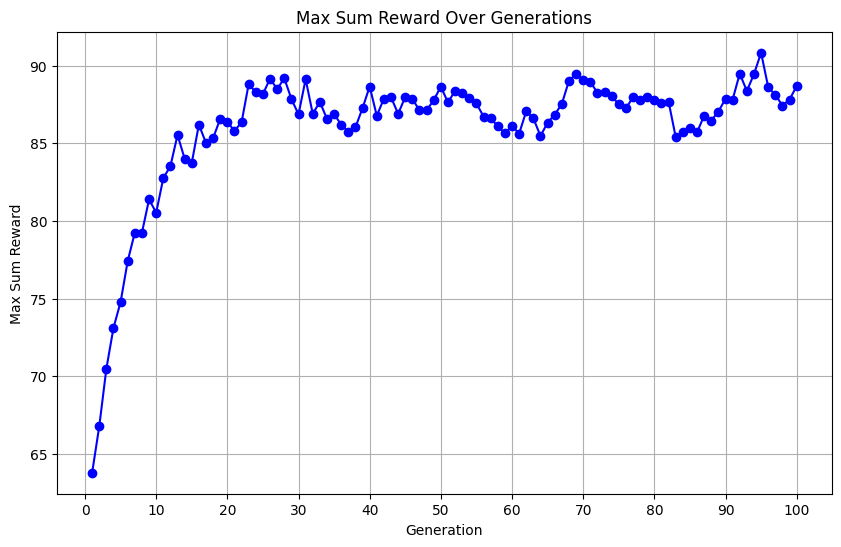

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the 100x100 channel matrix (C) and reward matrix (R) from CSV files
C = np.loadtxt('channel_matrix.csv', delimiter=',')
R = np.loadtxt('reward_matrix.csv', delimiter=',')

# Ensure both matrices are of size 100x100
assert C.shape == (100, 100), "Channel matrix C should be of size 100x100"
assert R.shape == (100, 100), "Reward matrix R should be of size 100x100"

# Normalize the reward matrix R to the range [0, 1]
R_normalized = R / 100.0

# Genetic algorithm parameters
population_size = 50      # Number of matrices in the population
mutation_rate = 0.1       # Mutation probability for each matrix cell
num_generations = 100     # Number of generations to run
selection_ratio = 0.2     # Percentage of top performers to keep

# List to store max sum rewards for each generation
max_rewards = []

# Define the fitness function (sum of element-wise multiplication of 15x15 subsection of C and candidate R matrix)
def fitness_function(C, R):
    # Extract the 15x15 subsection (top-left corner)
    C_subsection = C[:15, :15]
    R_subsection = R[:15, :15]
    return np.sum(np.multiply(C_subsection, R_subsection))

# Initialize the population with random matrices in the range [0, 1]
population = [np.random.rand(100, 100) for _ in range(population_size)]

# Evolution process
for generation in range(num_generations):
    # Calculate fitness scores for each matrix in the population
    fitness_scores = [fitness_function(C, individual) for individual in population]

    # Store the maximum fitness score for this generation
    max_rewards.append(max(fitness_scores))

    # Select the top-performing individuals
    top_performers_idx = np.argsort(fitness_scores)[-int(selection_ratio * population_size):]

    # Generate the next generation
    next_generation = []

    # Crossover: Combine pairs of top performers to create new matrices
    while len(next_generation) < population_size:
        parent_indices = np.random.choice(top_performers_idx, 2, replace=False)
        parent1 = population[parent_indices[0]]
        parent2 = population[parent_indices[1]]

        # Randomly choose crossover points
        mask = np.random.rand(100, 100) > 0.5
        child = np.where(mask, parent1, parent2)
        next_generation.append(child)

    # Mutation: Apply random changes to some elements in each matrix
    for individual in next_generation:
        mutation_mask = np.random.rand(100, 100) < mutation_rate
        individual[mutation_mask] = np.random.rand(np.sum(mutation_mask))

    # Update the population
    population = next_generation

# Get the best individual from the final generation
final_fitness_scores = [fitness_function(C, individual) for individual in population]
best_individual_idx = np.argmax(final_fitness_scores)
best_individual = population[best_individual_idx]

# Rescale the optimized reward matrix back to the original range [1, 100]
best_individual_rescaled = best_individual * 100

# Calculate final max sum reward based on the 15x15 subsection
final_max_sum_reward = fitness_function(C, best_individual_rescaled)

# Extract the 15x15 subsections for output
C_subsection = C[:15, :15]
R_subsection = R[:15, :15]
optimized_subsection = best_individual_rescaled[:15, :15]

# Output the relevant matrices and values
print("Channel Matrix (C) - 15x15 Subsection:")
print(C_subsection)

print("\nOriginal Reward Matrix (R) - 15x15 Subsection:")
print(R_subsection)

print("\nOptimized Reward Matrix (R) - 15x15 Subsection:")
print(optimized_subsection)

print("\nFinal Max Sum Reward (based on 15x15 subsection):", final_max_sum_reward)

# Plotting the maximum sum rewards over generations
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_generations + 1), max_rewards, marker='o', color='b', linestyle='-')
plt.title('Max Sum Reward Over Generations')
plt.xlabel('Generation')
plt.ylabel('Max Sum Reward')
plt.grid()
plt.xticks(np.arange(0, num_generations + 1, step=10))  # Adjust the x-ticks for clarity
plt.show()


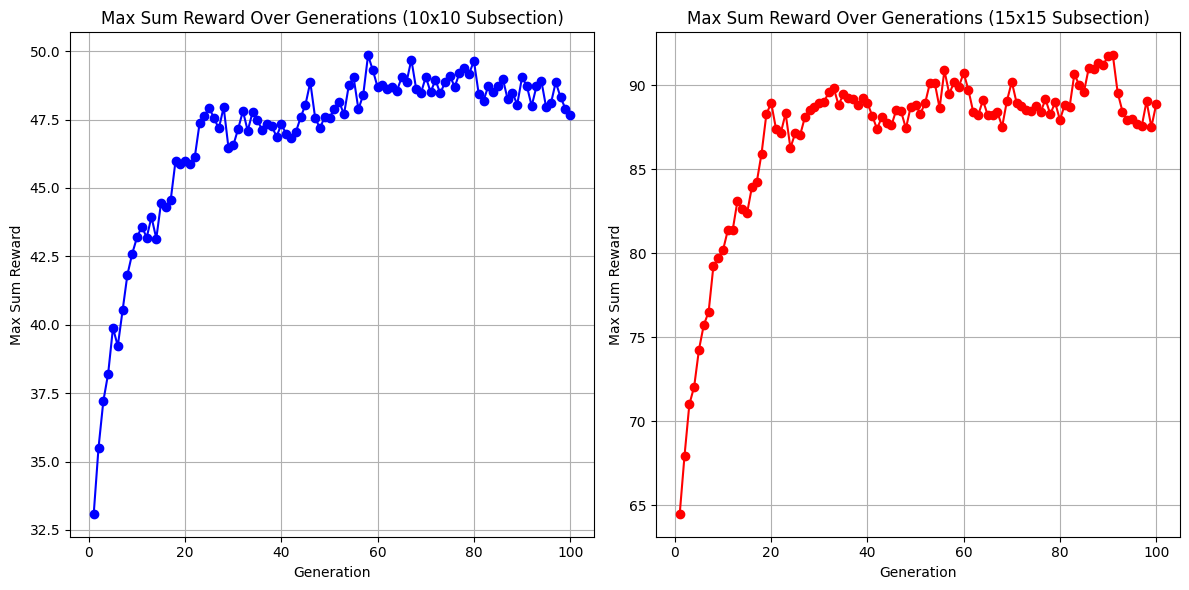

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the 100x100 channel matrix (C) and reward matrix (R) from CSV files
C = np.loadtxt('channel_matrix.csv', delimiter=',')
R = np.loadtxt('reward_matrix.csv', delimiter=',')

# Ensure both matrices are of size 100x100
assert C.shape == (100, 100), "Channel matrix C should be of size 100x100"
assert R.shape == (100, 100), "Reward matrix R should be of size 100x100"

# Normalize the reward matrix R to the range [0, 1]
R_normalized = R / 100.0

# Genetic algorithm parameters
population_size = 50      # Number of matrices in the population
mutation_rate = 0.1       # Mutation probability for each matrix cell
num_generations = 100     # Number of generations to run
selection_ratio = 0.2     # Percentage of top performers to keep

# Define the fitness function (for 10x10 and 15x15 subsections)
def fitness_function(C, R, size):
    # Extract the subsection based on size
    C_subsection = C[:size, :size]
    R_subsection = R[:size, :size]
    return np.sum(np.multiply(C_subsection, R_subsection))

# Initialize the population with random matrices in the range [0, 1]
population = [np.random.rand(100, 100) for _ in range(population_size)]

# Lists to store max rewards for each generation
max_rewards_10x10 = []
max_rewards_15x15 = []

# Evolution process for 10x10
for generation in range(num_generations):
    fitness_scores = [fitness_function(C, individual, 10) for individual in population]
    max_rewards_10x10.append(np.max(fitness_scores))

    top_performers_idx = np.argsort(fitness_scores)[-int(selection_ratio * population_size):]

    next_generation = []

    while len(next_generation) < population_size:
        parent_indices = np.random.choice(top_performers_idx, 2, replace=False)
        parent1 = population[parent_indices[0]]
        parent2 = population[parent_indices[1]]

        mask = np.random.rand(100, 100) > 0.5
        child = np.where(mask, parent1, parent2)
        next_generation.append(child)

    for individual in next_generation:
        mutation_mask = np.random.rand(100, 100) < mutation_rate
        individual[mutation_mask] = np.random.rand(np.sum(mutation_mask))

    population = next_generation

# Reset population for 15x15 optimization
population = [np.random.rand(100, 100) for _ in range(population_size)]

# Evolution process for 15x15
for generation in range(num_generations):
    fitness_scores = [fitness_function(C, individual, 15) for individual in population]
    max_rewards_15x15.append(np.max(fitness_scores))

    top_performers_idx = np.argsort(fitness_scores)[-int(selection_ratio * population_size):]

    next_generation = []

    while len(next_generation) < population_size:
        parent_indices = np.random.choice(top_performers_idx, 2, replace=False)
        parent1 = population[parent_indices[0]]
        parent2 = population[parent_indices[1]]

        mask = np.random.rand(100, 100) > 0.5
        child = np.where(mask, parent1, parent2)
        next_generation.append(child)

    for individual in next_generation:
        mutation_mask = np.random.rand(100, 100) < mutation_rate
        individual[mutation_mask] = np.random.rand(np.sum(mutation_mask))

    population = next_generation

# Plotting the results
plt.figure(figsize=(12, 6))

# Plotting the 10x10 rewards
plt.subplot(1, 2, 1)
plt.plot(range(1, num_generations + 1), max_rewards_10x10, marker='o', color='b', linestyle='-')
plt.title('Max Sum Reward Over Generations (10x10 Subsection)')
plt.xlabel('Generation')
plt.ylabel('Max Sum Reward')
plt.grid()

# Plotting the 15x15 rewards
plt.subplot(1, 2, 2)
plt.plot(range(1, num_generations + 1), max_rewards_15x15, marker='o', color='r', linestyle='-')
plt.title('Max Sum Reward Over Generations (15x15 Subsection)')
plt.xlabel('Generation')
plt.ylabel('Max Sum Reward')
plt.grid()

plt.tight_layout()
plt.show()


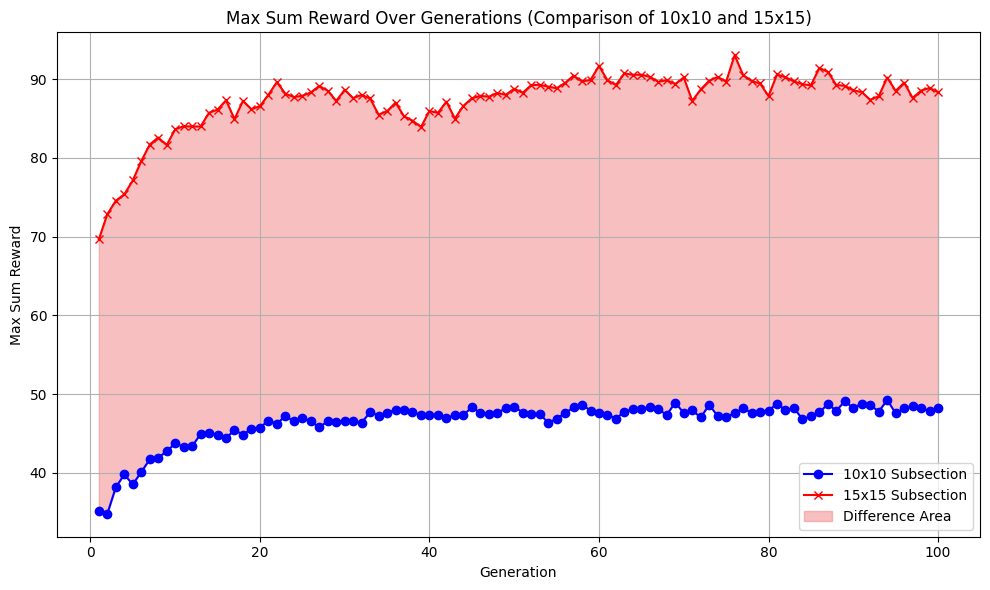

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the 100x100 channel matrix (C) and reward matrix (R) from CSV files
C = np.loadtxt('channel_matrix.csv', delimiter=',')
R = np.loadtxt('reward_matrix.csv', delimiter=',')

# Ensure both matrices are of size 100x100
assert C.shape == (100, 100), "Channel matrix C should be of size 100x100"
assert R.shape == (100, 100), "Reward matrix R should be of size 100x100"

# Normalize the reward matrix R to the range [0, 1]
R_normalized = R / 100.0

# Genetic algorithm parameters
population_size = 50      # Number of matrices in the population
mutation_rate = 0.1       # Mutation probability for each matrix cell
num_generations = 100     # Number of generations to run
selection_ratio = 0.2     # Percentage of top performers to keep

# Define the fitness function (for 10x10 and 15x15 subsections)
def fitness_function(C, R, size):
    # Extract the subsection based on size
    C_subsection = C[:size, :size]
    R_subsection = R[:size, :size]
    return np.sum(np.multiply(C_subsection, R_subsection))

# Initialize the population with random matrices in the range [0, 1]
population = [np.random.rand(100, 100) for _ in range(population_size)]

# Lists to store max rewards for each generation
max_rewards_10x10 = []
max_rewards_15x15 = []

# Evolution process for 10x10
for generation in range(num_generations):
    fitness_scores = [fitness_function(C, individual, 10) for individual in population]
    max_rewards_10x10.append(np.max(fitness_scores))

    top_performers_idx = np.argsort(fitness_scores)[-int(selection_ratio * population_size):]

    next_generation = []

    while len(next_generation) < population_size:
        parent_indices = np.random.choice(top_performers_idx, 2, replace=False)
        parent1 = population[parent_indices[0]]
        parent2 = population[parent_indices[1]]

        mask = np.random.rand(100, 100) > 0.5
        child = np.where(mask, parent1, parent2)
        next_generation.append(child)

    for individual in next_generation:
        mutation_mask = np.random.rand(100, 100) < mutation_rate
        individual[mutation_mask] = np.random.rand(np.sum(mutation_mask))

    population = next_generation

# Reset population for 15x15 optimization
population = [np.random.rand(100, 100) for _ in range(population_size)]

# Evolution process for 15x15
for generation in range(num_generations):
    fitness_scores = [fitness_function(C, individual, 15) for individual in population]
    max_rewards_15x15.append(np.max(fitness_scores))

    top_performers_idx = np.argsort(fitness_scores)[-int(selection_ratio * population_size):]

    next_generation = []

    while len(next_generation) < population_size:
        parent_indices = np.random.choice(top_performers_idx, 2, replace=False)
        parent1 = population[parent_indices[0]]
        parent2 = population[parent_indices[1]]

        mask = np.random.rand(100, 100) > 0.5
        child = np.where(mask, parent1, parent2)
        next_generation.append(child)

    for individual in next_generation:
        mutation_mask = np.random.rand(100, 100) < mutation_rate
        individual[mutation_mask] = np.random.rand(np.sum(mutation_mask))

    population = next_generation

# Plotting the results with differences highlighted
plt.figure(figsize=(10, 6))

# Plot both rewards
plt.plot(range(1, num_generations + 1), max_rewards_10x10, marker='o', color='b', linestyle='-', label='10x10 Subsection')
plt.plot(range(1, num_generations + 1), max_rewards_15x15, marker='x', color='r', linestyle='-', label='15x15 Subsection')

# Fill the area between the two lines
plt.fill_between(range(1, num_generations + 1), max_rewards_10x10, max_rewards_15x15,
                 where=(np.array(max_rewards_15x15) > np.array(max_rewards_10x10)),
                 color='lightcoral', alpha=0.5, label='Difference Area')

plt.fill_between(range(1, num_generations + 1), max_rewards_10x10, max_rewards_15x15,
                 where=(np.array(max_rewards_15x15) < np.array(max_rewards_10x10)),
                 color='lightblue', alpha=0.5)

plt.title('Max Sum Reward Over Generations (Comparison of 10x10 and 15x15)')
plt.xlabel('Generation')
plt.ylabel('Max Sum Reward')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load the 100x100 channel matrix (C) and reward matrix (R) from CSV files
C = np.loadtxt('channel_matrix.csv', delimiter=',')
R = np.loadtxt('reward_matrix.csv', delimiter=',')

# Ensure both matrices are of size 100x100
assert C.shape == (100, 100), "Channel matrix C should be of size 100x100"
assert R.shape == (100, 100), "Reward matrix R should be of size 100x100"

# Normalize the reward matrix R to the range [0, 1]
R_normalized = R / 100.0

# Genetic algorithm parameters
population_size = 50      # Number of matrices in the population
mutation_rate = 0.1       # Mutation probability for each matrix cell
num_generations = 100     # Number of generations to run
selection_ratio = 0.2     # Percentage of top performers to keep
num_runs = 20             # Number of runs per generation to calculate average

# Define the fitness function (sum of element-wise multiplication of 15x15 subsection of C and candidate R matrix)
def fitness_function(C, R):
    # Extract the 15x15 subsection (top-left corner)
    C_subsection = C[:15, :15]
    R_subsection = R[:15, :15]
    return np.sum(np.multiply(C_subsection, R_subsection))

# Store the average max rewards across runs for each generation
avg_max_rewards_per_generation = np.zeros(num_generations)

# Run the genetic algorithm 20 times for averaging
for run in range(num_runs):
    # Initialize the population with random matrices in the range [0, 1]
    population = [np.random.rand(100, 100) for _ in range(population_size)]
    max_rewards = []  # Store max rewards for each generation in this run

    # Evolution process for each generation
    for generation in range(num_generations):
        # Calculate fitness scores for each matrix in the population
        fitness_scores = [fitness_function(C, individual) for individual in population]

        # Store the maximum fitness score for this generation
        max_rewards.append(max(fitness_scores))

        # Select the top-performing individuals
        top_performers_idx = np.argsort(fitness_scores)[-int(selection_ratio * population_size):]

        # Generate the next generation
        next_generation = []

        # Crossover: Combine pairs of top performers to create new matrices
        while len(next_generation) < population_size:
            parent_indices = np.random.choice(top_performers_idx, 2, replace=False)
            parent1 = population[parent_indices[0]]
            parent2 = population[parent_indices[1]]

            # Randomly choose crossover points
            mask = np.random.rand(100, 100) > 0.5
            child = np.where(mask, parent1, parent2)
            next_generation.append(child)

        # Mutation: Apply random changes to some elements in each matrix
        for individual in next_generation:
            mutation_mask = np.random.rand(100, 100) < mutation_rate
            individual[mutation_mask] = np.random.rand(np.sum(mutation_mask))

        # Update the population
        population = next_generation

    # Update average max rewards across generations for this run
    avg_max_rewards_per_generation += np.array(max_rewards)

# Calculate the average max rewards over all runs
avg_max_rewards_per_generation /= num_runs

# Plotting the average maximum sum rewards over generations
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_generations + 1), avg_max_rewards_per_generation, marker='o', color='b', linestyle='-')
plt.title('Average Max Sum Reward Over Generations (15x15 Subsection, Averaged Over 20 Runs)')
plt.xlabel('Generation')
plt.ylabel('Average Max Sum Reward')
plt.grid()
plt.xticks(np.arange(0, num_generations + 1, step=10))  # Adjust the x-ticks for clarity
plt.show()


FileNotFoundError: channel_matrix.csv not found.